# **Titanic Analysis notebook**

 ### Challange: Figure out what sorts of people were more likely to survive the Titanic sinking

| **Data Dictionary**  |  |     ||
| ----------- | ----------- | ----------- |-----------|
| **Variable** | **Definition** | **Key** |**Hungarian Transcript**|
PassengerId | passanger id |Distinct|Utas azonosító – Minden utasnak egyedi sorszáma.
survival	|Survival|	0 = No, 1 = Yes|Túlélés –> 0 = meghalt, 1 = túlélte a katasztrófát.|
pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|Osztály – A hajó utaskategóriája: 1 = első osztály, 2 = másodosztály, 3 = harmadosztály.|
Name | Full name (with rank sometimes) | |Név – Az utas teljes neve (néha tartalmazza a rangot, pl. Mr., Mrs., Miss).|
sex	|Sex	||Nem – male = férfi, female = nő.
Age	|Age in years	||Kor – Az utas életkora években. Hiányzó érték lehet.
sibsp	|# of siblings / spouses aboard the Titanic	||Testvér/Partner száma a hajón – Hány testvér vagy házastárs utazott vele a hajón.
parch	|# of parents / children aboard the Titanic	||Szülő/Gyermek száma a hajón – Hány szülője vagy gyermeke utazott vele a hajón.
ticket	|Ticket number	||Jegyszám – Az utas jegyének azonosítója (szöveg vagy szám).
fare	|Passenger fare	||Fizetett jegyár – Az utas által fizetett jegy ára fontban.
cabin	|Cabin number	||Kabinszám – A kabin, ahol az utas lakott (sok üres érték).
embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton||Beszállási kikötő – A hajóra szállás helye

---
| **Variable Notes** | | | | |
| ----------- | ----------- | ----------- |-----------|-----------|
| ----------- | **pclass** | **age** | **sibsp** | **parch** |
| English | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower | Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5 | Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés ignored) | Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children travelled only with a nanny, therefore parch=0 |
| Hungarian | A társadalmi-gazdasági státusz (SES) közelítő mutatója: 1 = Felső osztály, 2 = Középosztály, 3 = Alsó osztály | Az életkor törtszám, ha kevesebb, mint 1. Ha becsült, xx.5 formában szerepel | Testvér = fiútestvér, lánytestvér, mostohatestvér; Házastárs = férj, feleség (szeretők és menyasszonyok figyelmen kívül hagyva) | Szülő = anya, apa; Gyermek = lánya, fia, mostohalánya, mostohafia; Néhány gyermek csak a dadával utazott, ezért parch=0 |


### Data Preprocessing

In [1]:
# Import libs/modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data into a df
gender_submission = pd.read_csv('titanic\\gender_submission.csv')
test = pd.read_csv('titanic\\test.csv')
train = pd.read_csv('titanic\\train.csv')

In [3]:
# Check shape
print(f"Train shape: {train.shape}, Test shape: {test.shape}, Gender submission shape: {gender_submission.shape}")

Train shape: (891, 12), Test shape: (418, 11), Gender submission shape: (418, 2)


In [4]:
# Look at the data
'''train_features.head()
train_features.tail()'''

'train_features.head()\ntrain_features.tail()'

In [5]:
# Split the data -> X,y
train_labels = train['Survived'].copy()
# Drop Ticket because it is too complex
train_features = train.drop(columns =['Survived','Ticket']).copy()

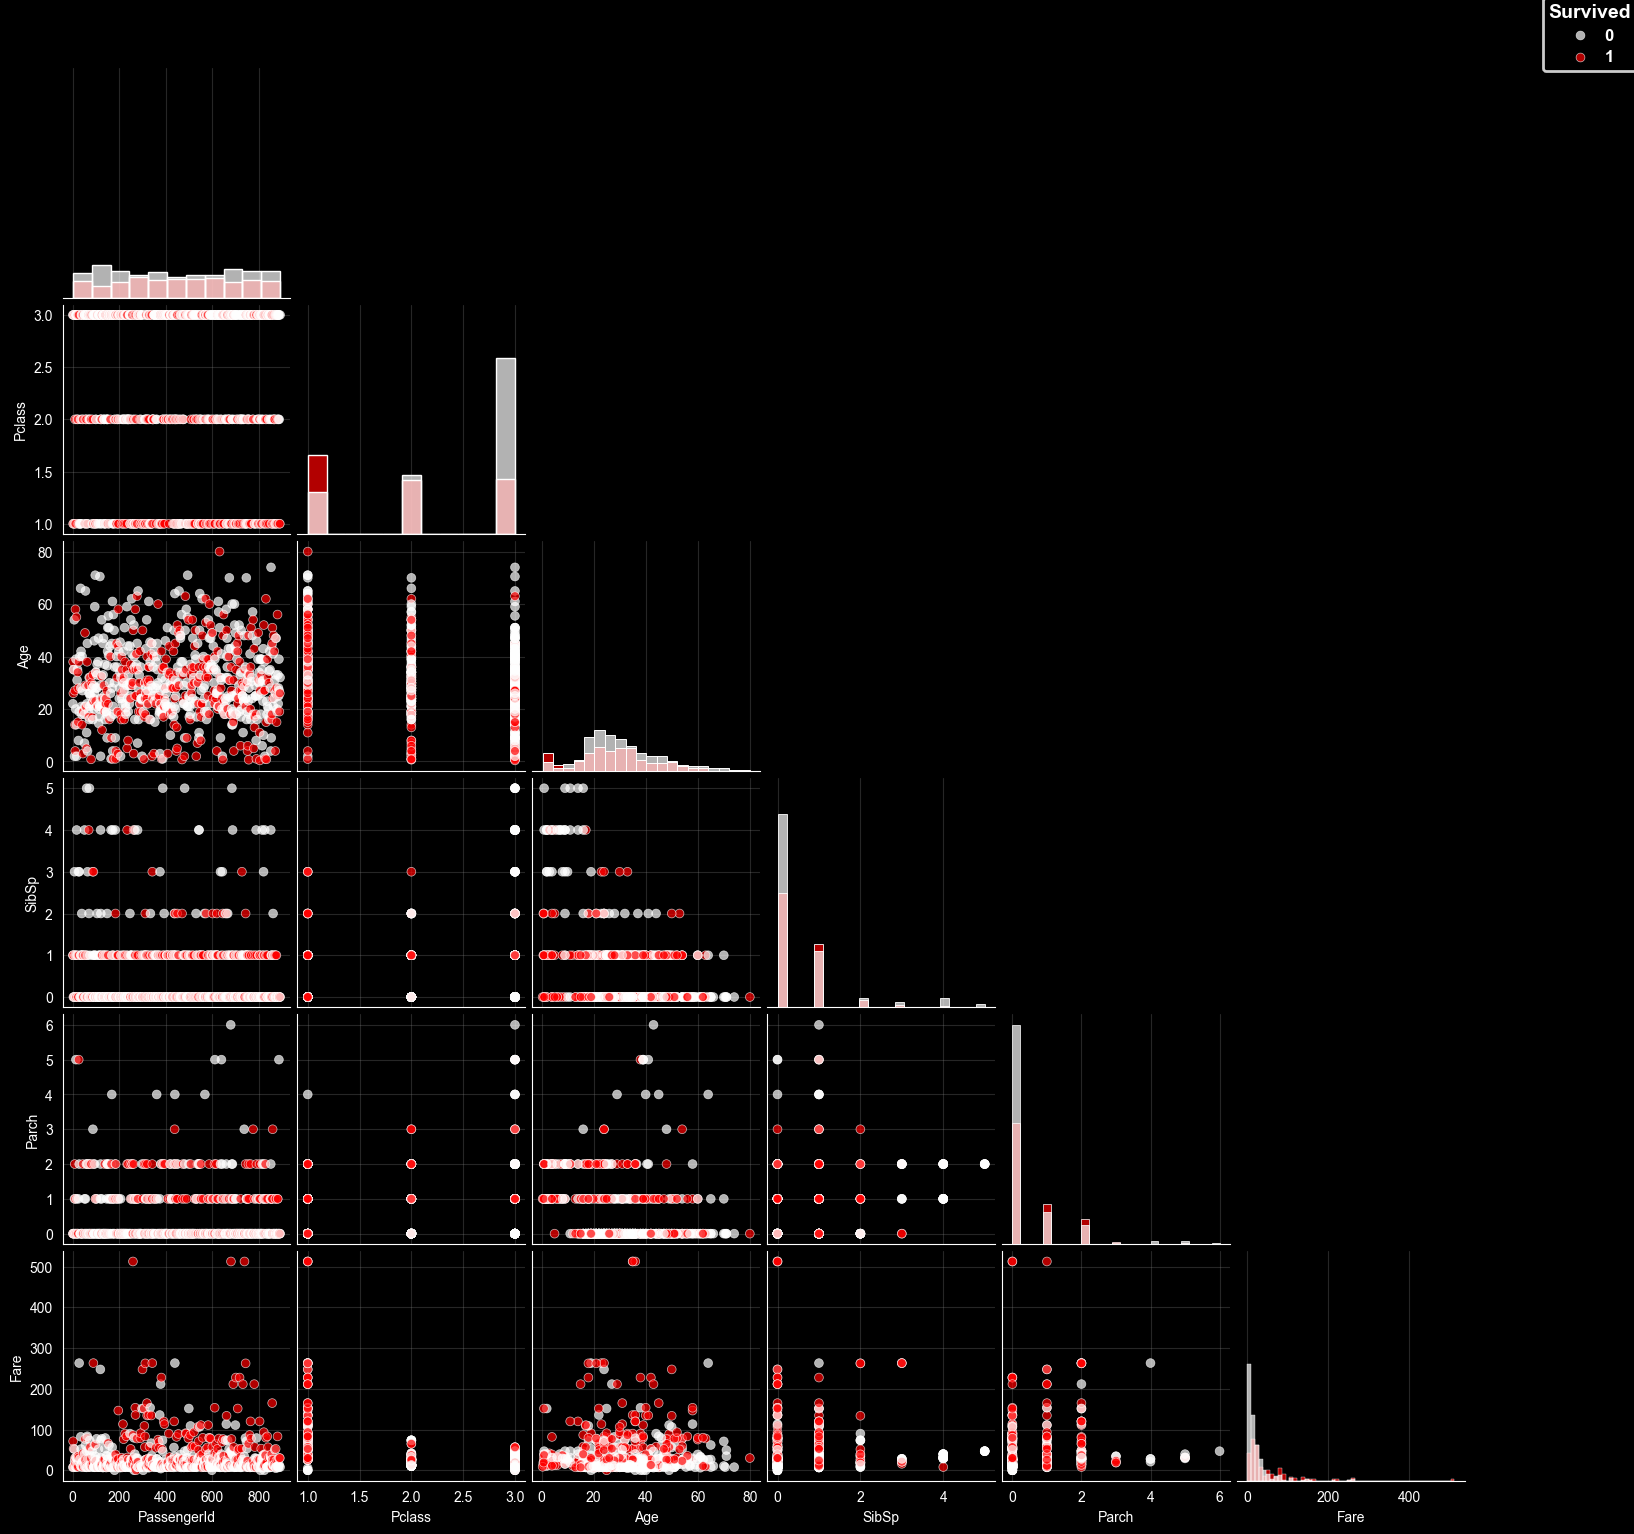

'plt.style.use(\'default\')\nsns.set_style("whitegrid")'

In [6]:
# Visualize the data on a Pairplot
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

plot_cols = [col for col in numeric_cols if col != 'Survived'] + ['Survived']
# Drop missing values because pairplot cannot handle NaN values
plot_data = train[plot_cols].dropna()

# Set style with black background
plt.style.use('dark_background')
sns.set_style("dark")

# Pairplot
g = sns.pairplot(plot_data, hue='Survived', diag_kind='hist', corner=True, 
                 plot_kws={'alpha': 0.7, 's': 40}, 
                 diag_kws={'alpha': 0.7},
                 palette=['white', 'red'])

g.figure.patch.set_facecolor('black')
for ax in g.axes.flat:
    if ax:
        ax.set_facecolor('black')
        ax.grid(True, alpha=0.3, color='gray')
        ax.tick_params(colors='white')
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

legend = g._legend
if legend:
    legend.set_frame_on(True)
    legend.get_frame().set_facecolor('black')
    legend.get_frame().set_edgecolor('white')
    legend.get_frame().set_linewidth(2)
    
    for text in legend.get_texts():
        text.set_color('white')
        text.set_fontsize(12)
        text.set_weight('bold')
    
    legend.set_bbox_to_anchor((1.05, 1))
    legend.set_title('Survived', prop={'size': 14, 'weight': 'bold'})
    legend.get_title().set_color('white')

plt.show();
# Reset style back to default
'''plt.style.use('default')
sns.set_style("whitegrid")'''

In [7]:
# Check duplicate rows
print("Duplicate rows:\n",train_features.duplicated().sum())
# Check for duplicates in each column separately
print("Duplicates in each column separately:\n")
for col in train_features.columns:
    print(f"{col}: {train_features[col].duplicated().sum()} duplicates")

Duplicate rows:
 0
Duplicates in each column separately:

PassengerId: 0 duplicates
Pclass: 888 duplicates
Name: 0 duplicates
Sex: 889 duplicates
Age: 802 duplicates
SibSp: 884 duplicates
Parch: 884 duplicates
Fare: 643 duplicates
Cabin: 743 duplicates
Embarked: 887 duplicates


In [8]:
# Count NaN/null values per column
na_counts = train_features.isna().sum()
print(na_counts)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Look at mean max....
train_features.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Fill NA of Age with median
train_features['Age'] = train_features['Age'].fillna(train_features['Age'].median())
# Change Column Cabin -> Too many Nan -> make two categories Known:1, Unknown:0
train_features['Cabin_binary'] = train_features['Cabin'].notna().astype(int)

In [11]:
# Look at classes of Embarked and NA num
train_features['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [12]:
# Fill NA with mode (S)
train_features['Embarked'] = train_features['Embarked'].fillna(train_features['Embarked'].mode()[0])

In [13]:
# Sex_numeric -> male:0, female:1
train_features['Sex_binary'] = train_features['Sex'].map({'male':0,'female':1})
# Drop original columns Sex, Cabin
train_features.drop(columns=['Sex','Cabin'], inplace=True)

In [14]:
# Define standard one hot encoding function
def onehot_feature_encoding(features : pd.DataFrame, columns_names : list[str]) -> pd.DataFrame:

    encoder = OneHotEncoder(sparse_output=False) #  sparse=False to get a DataFrame-like array
    encoded_array = encoder.fit_transform(features[columns_names])
    encoded_features = pd.DataFrame(
        encoded_array, 
        columns=encoder.get_feature_names_out(columns_names),
        index=features.index
    )
    features = pd.concat([features, encoded_features], axis=1)
    #Drop original
    features.drop(columns=columns_names, inplace=True)
    return features

In [15]:
# Onehot-encode
train_features = onehot_feature_encoding(train_features, ['Embarked','Pclass'])

In [16]:
# Define standardization function
def standardize(features : pd.DataFrame, columns_name : list[str]) -> pd.DataFrame:

    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(features[columns_name])
    scaled_features = pd.DataFrame(scaled_array, columns=columns_name, index=features.index)
    return scaled_features

In [17]:
# Standardize
train_features[["Age", "Fare", "SibSp", "Parch"]] = standardize(train_features, ["Age", "Fare", "SibSp", "Parch"])

In [18]:
# Create title column
train_features['Name_title'] = train_features['Name'].apply(lambda x: x.split()[1])
# Drop name cause irrelevant 
train_features.drop(columns=['Name'], inplace=True)

In [19]:
# Print unique
print(train_features['Name_title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Planke,' 'Don.' 'Rev.' 'Billiard,' 'der'
 'Walle,' 'Dr.' 'Pelsmaeker,' 'Mulder,' 'y' 'Steen,' 'Carlo,' 'Mme.'
 'Impe,' 'Ms.' 'Major.' 'Gordon,' 'Messemaeker,' 'Mlle.' 'Col.' 'Capt.'
 'Velde,' 'the' 'Shawah,' 'Jonkheer.' 'Melkebeke,' 'Cruyssen,']


In [20]:
# Map titles into broader categories
title_map = {
    'Mr.': 'Man',
    'Mrs.': 'Woman_married',
    'Miss.': 'Woman_unmarried',
    'Ms.': 'Woman_other',
    'Mme.': 'Woman_married',   # French equivalent of Mrs.
    'Mlle.': 'Woman_unmarried', # French equivalent of Miss
    'Master.': 'Boy',

    # Professionals / clergy
    'Dr.': 'Professional',
    'Rev.': 'Professional',

    # Military
    'Col.': 'Military',
    'Major.': 'Military',
    'Capt.': 'Military',

    # Nobility / honorifics
    'Don.': 'Nobility',
    'Jonkheer.': 'Nobility',
    'Lady.': 'Nobility',
    'Countess.': 'Nobility',
    'Dona.': 'Nobility'
}

# Apply mapping, fill unknowns as "Other"
train_features['Name_title_grouped'] = train_features['Name_title'].map(title_map).fillna('Other')
#Remove name title after grouping into broader categories
train_features.drop(columns=['Name_title'],inplace=True)

In [21]:
train_features['Name_title_grouped'].value_counts()

Name_title_grouped
Man                502
Woman_unmarried    181
Woman_married      122
Boy                 40
Other               25
Professional        13
Military             5
Nobility             2
Woman_other          1
Name: count, dtype: int64

In [22]:
# Do this before training because if you do it before your index wont be aligned when onehot-encoding!
#train.set_index('PassengerId', inplace=True)

In [23]:
train_features

,PassengerId,Age,SibSp,Parch,Fare,Cabin_binary,Sex_binary,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Name_title_grouped
0,1,-0.565736,0.432793,-0.473674,-0.502445,0,0,0.0,0.0,1.0,0.0,0.0,1.0,Man
1,2,0.663861,0.432793,-0.473674,0.786845,1,1,1.0,0.0,0.0,1.0,0.0,0.0,Woman_married
2,3,-0.258337,-0.474545,-0.473674,-0.488854,0,1,0.0,0.0,1.0,0.0,0.0,1.0,Woman_unmarried
3,4,0.433312,0.432793,-0.473674,0.420730,1,1,0.0,0.0,1.0,1.0,0.0,0.0,Woman_married
4,5,0.433312,-0.474545,-0.473674,-0.486337,0,0,0.0,0.0,1.0,0.0,0.0,1.0,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.181487,-0.474545,-0.473674,-0.386671,0,0,0.0,0.0,1.0,0.0,1.0,0.0,Professional
887,888,-0.796286,-0.474545,-0.473674,-0.044381,1,1,0.0,0.0,1.0,1.0,0.0,0.0,Woman_unmarried
888,889,-0.104637,0.432793,2.008933,-0.176263,0,1,0.0,0.0,1.0,0.0,0.0,1.0,Woman_unmarried
889,890,-0.258337,-0.474545,-0.473674,-0.044381,1,0,1.0,0.0,0.0,1.0,0.0,0.0,Man


In [24]:
'''TODO 
Title One-Hot encoding,
Remove passangerid from trainig data,
Preprocess test set, 
Check how many travelers had two titles -> if significant -> include it in one hot encoding
'''

'TODO \nTitle One-Hot encoding,\nRemove passangerid from trainig data,\nPreprocess test set, \nCheck how many travelers had two titles -> if significant -> include it in one hot encoding\n'